In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("population_dataset.csv")
dataset.drop(['Unnamed: 0'], axis=1,inplace=True)
dataset

,name_region,nombre_terrase,nombre_logement,surface_region,distance,population
0,SAINT-AGNE,9,3865.000673,5.013747e+05,2.608506,5947.884723
1,MATABIAU,53,5751.500955,3.882656e+05,0.782908,7784.300731
2,CAPITOLE,121,5028.000877,4.294602e+05,0.334373,6785.683426
3,PAPUS,2,2580.000478,7.083979e+05,4.169789,5440.125631
4,ARNAUD BERNARD,116,6186.501035,6.204326e+05,0.458999,8637.299554
5,PATTE D'OIE,28,6624.001202,8.261592e+05,1.659888,10304.836667
6,CROIX-DE-PIERRE,6,3816.500659,1.088998e+06,3.338641,6461.204101
7,SAINT-MICHEL,27,7595.001339,7.254467e+05,1.865657,10343.845566
8,CASSELARDIT,3,7121.501258,2.166095e+06,2.777995,11632.813500
9,ROSERAIE,3,5248.000955,1.222647e+06,3.163299,9483.206996


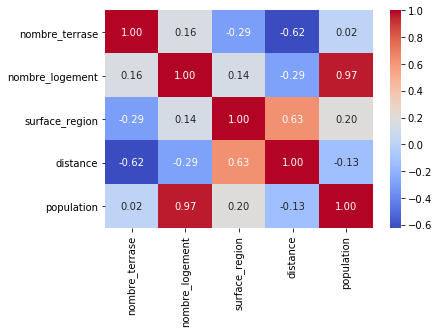

<Figure size 1080x360 with 0 Axes>

In [4]:
g = sns.heatmap(dataset.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.figure(figsize=(15,5));

In [5]:
X_value = np.array(dataset[dataset.columns[1:]])

In [6]:
X=preprocessing.scale(X_value)

In [7]:
X

array([[-0.19760128, -0.25144022, -0.70945625, -0.3593596 , -0.3734327 ],
       [ 1.26365187,  0.42997135, -0.7641606 , -1.41677951,  0.03225329],
       [ 3.52195218,  0.16864018, -0.74423715, -1.67657946, -0.18835307],
       [-0.43007337, -0.7155875 , -0.60933106,  0.54496461, -0.48560268],
       [ 3.35590069,  0.58709514, -0.6518748 , -1.60439362,  0.2206908 ],
       [ 0.4333944 ,  0.74512198, -0.55237666, -0.90881659,  0.58906944],
       [-0.29723217, -0.26895862, -0.42525673,  0.06354826, -0.26003439],
       [ 0.4001841 ,  1.09585117, -0.60108551, -0.78963138,  0.59768697],
       [-0.39686307,  0.92482102,  0.09567323, -0.26118857,  0.88243521],
       [-0.39686307,  0.2481051 , -0.36061818, -0.03801321,  0.40756174],
       [-0.49649397, -0.42048374, -0.45172992,  1.12462593,  0.17935177],
       [ 2.69169471, -0.07752044, -0.69912347, -1.32660578, -0.38498662],
       [-0.33044247,  0.03102141, -0.43767958, -0.92872319, -0.20781732],
       [-0.46328367, -0.50970115, -0.1

In [8]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.explained_variance_ratio_

array([0.43671711, 0.38629376, 0.13266161, 0.04103265, 0.00329487])

In [10]:
var_cum = pca.explained_variance_ratio_.cumsum()
var_cum

array([0.43671711, 0.82301087, 0.95567248, 0.99670513, 1.        ])

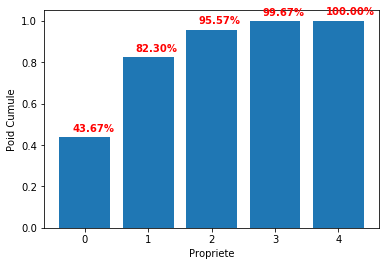

In [11]:
pos=np.arange(5)
fig,ax=plt.subplots()
fig=plt.bar(pos,var_cum)
for i, v in enumerate(var_cum):
    ax.text(i-0.2, v+0.03,"{:.2f}%" .format(v*100), color='red', fontweight='bold')
    
ax.set_xlabel('Propriete');
ax.set_ylabel('Poid Cumule');

In [12]:
X_pca=pca.fit_transform(X)
X_pca

array([[-1.79477359e-02, -7.51276576e-01, -5.46594016e-01,
        -7.40404735e-02,  7.21269858e-02],
       [ 1.71018316e+00, -1.14788850e+00,  3.09675243e-01,
        -1.62001702e-01,  9.70541341e-02],
       [ 2.55058061e+00, -2.21735161e+00,  2.04778769e+00,
         4.62879463e-01, -5.54051850e-02],
       [-9.14532058e-01, -5.48358292e-01, -5.30585312e-01,
         4.22887960e-01, -6.07338223e-02],
       [ 2.82554628e+00, -1.68781493e+00,  1.88947633e+00,
         5.01470333e-01, -2.12118804e-02],
       [ 1.45919300e+00, -1.40498021e-01, -2.50965584e-01,
        -9.01669993e-02,  3.17825986e-02],
       [-3.12086209e-01, -3.58222275e-01, -4.24107367e-01,
         8.29453075e-02,  2.67818361e-02],
       [ 1.58263516e+00,  4.95915897e-02, -3.25876554e-01,
         2.17913712e-02,  2.98704798e-01],
       [ 8.35324832e-01,  9.54632548e-01, -4.71170658e-01,
        -1.90105306e-01,  4.03268459e-02],
       [ 2.58756349e-01,  2.47482118e-01, -6.13373271e-01,
         8.76210078e-02

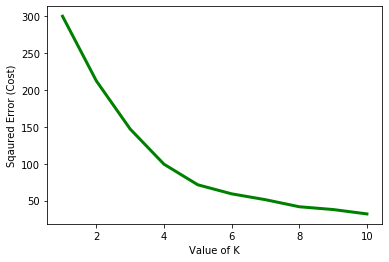

In [13]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(X_pca) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") ;
  
# the point of the elbow is the  
# most optimal value for choosing k 

In [14]:
KM = KMeans(n_clusters = 4, max_iter = 500) 
y_pred=KM.fit_predict(X_pca) 

In [15]:
y_pred

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 3, 0, 1,
       2, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

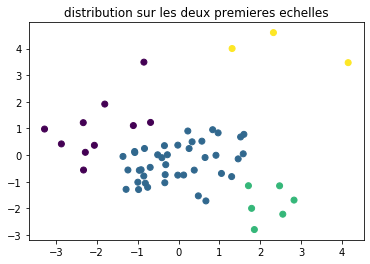

In [23]:
%matplotlib inline
fig, axs = plt.subplots()
fig=plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y_pred)
axs.set_title('distribution sur les deux premieres echelles');

In [25]:
traces = []
c = ['rgb(215,25,28)','rgb(253,174,97)','rgb(171,221,164)','rgb(43,131,186)']
name = ["class 0","class 1","class 2","class 3"]
for i in range(4):

    trace = go.Scatter3d(
        x=X_pca[y_pred==i][:,0],
        y=X_pca[y_pred==i][:,1],
        z=X_pca[y_pred==i][:,2],
        mode='markers',
        name=name[i],
        marker=dict(
            size=12,
            color=c[i],
            opacity=0.95
        )
    )
    traces.append(trace)
    
fig = go.Figure(data=traces)  

fig.update_layout(scene = dict(
                    xaxis_title='PCA 0',
                    yaxis_title='PCA 1',
                    zaxis_title='PCA 2'),
                  
                    margin=dict(r=20, b=10, l=10, t=10))



fig.show()


In [26]:
import plotly.offline as py
py.plot(fig,filename='distribution_3D_class.html')

'distribution_3D_class.html'

In [18]:
column_name =['nombre_terrase', 'nombre_logement', 'surface_region','distance', 'population'] 

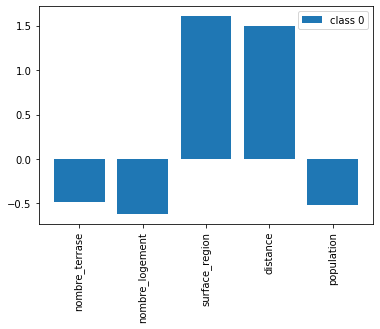

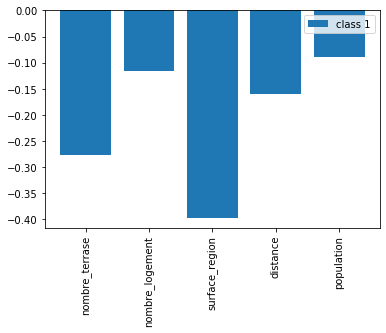

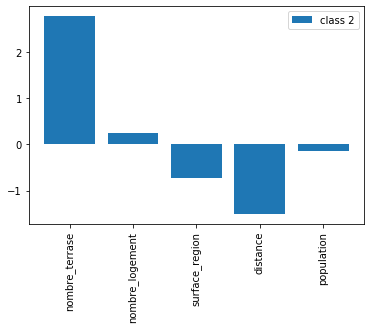

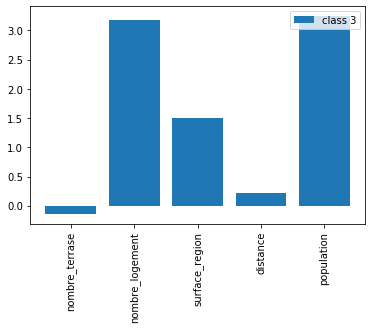

In [19]:
for i in range(4):
    height=np.mean(X[y_pred==i], axis=0)
    plt.bar(column_name,height,label='class '+str(i))
    plt.xticks(rotation = 90)
    plt.legend(loc="upper right")
    plt.show();